In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import os

In [2]:
dirs = ['scale1','scale2','scale3','scale4','scale5','scale6','scale7','scale8','scale9','scale10','scale11','scale12','scale13','scale14','scale15']
walkers = [1,1,1,1,1,1,1,1,1,2,4,8,2,4,8]
cores = np.array([1,2,4,8,16,16,16,16,16,16,16,16,32,32,32])

In [3]:

for ind, folder in enumerate(dirs):
    dirlist = os.listdir(folder)

    files = [file for file in dirlist if 'ipy' not in file]

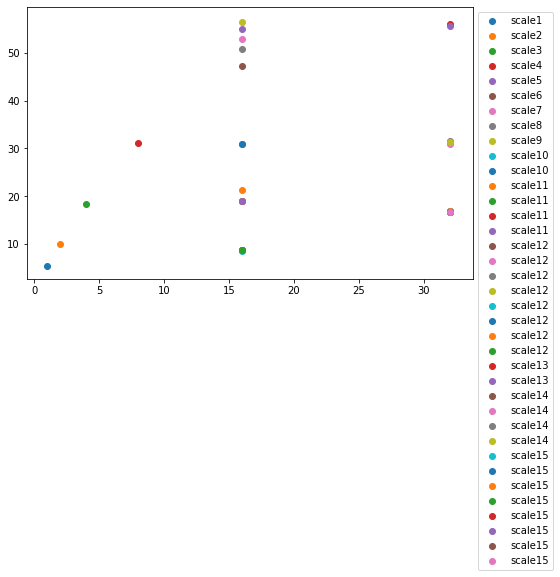

In [4]:
fig, ax = plt.subplots(figsize=(8,5))
ns_day_walker = []

for ind, folder in enumerate(dirs):
    dirlist = os.listdir(folder)

    files = [file for file in dirlist if 'ipy' not in file]
    
    for filename in files:
        with open(f'{folder}/{filename}','r') as file:
            for line in file.readlines():

                if 'Performance' in line:
                    ns_day = float(line.split()[1])
                    ns_day_walker.append((folder, filename, ns_day))
                    ax.scatter(cores[ind], ns_day, label=f'{folder}')
ax.legend(bbox_to_anchor=(1,1))

In [63]:
pd.DataFrame(ns_day_walker)[2].max()

56.425

In [6]:
df = pd.DataFrame(ns_day_walker, columns=['setup','file','ns/day/walker'])
df

,setup,file,ns/day/walker
0,scale1,md0.log,5.351
1,scale2,md0.log,10.056
2,scale3,md0.log,18.321
3,scale4,md0.log,31.153
4,scale5,md0.log,55.033
5,scale6,md0.log,47.183
6,scale7,md0.log,52.838
7,scale8,md0.log,50.693
8,scale9,md0.log,56.425
9,scale10,md0.log,30.877


In [12]:
# this is the mean ns/day/walker for scaling setup 13, which had 2 walkers
df[df['setup'] == 'scale13']['ns/day/walker'].mean()

55.806

In [11]:
# this is the mean ns/day/walker for scaling setup 14, which had 4 walkers
df[df['setup'] == 'scale14']['ns/day/walker'].mean()

31.1825

In [10]:
# this is the mean ns/day/walker for scaling setup 15, which had 8 walkers
df[df['setup'] == 'scale15']['ns/day/walker'].mean()

16.796249999999997

### Which setup is best? 
#### ns/walker/day
So the highest ns/day/walker comes from scale9 **(1 walker, 1 rank per walker, 16 threads per rank, on 1 node)**. This means setup 9 is most desireable if we can stand to only use 16 cores, it's the most **efficient**.

#### total ns/day
If we are going for purely ns/day, we can do a couple short calculations. Looks like the contest will definitely be between **scaling setups 13, 14, and 15**

- Scaling setup 13 had 2 walkers, each at ~55.806 ns/day. This equates to 111.6 ns/day total.
- Scaling setup 14 had 4 walkers, each at ~31.123 ns/day. This equates to 124.73 ns/day total. 
- Scaling setup 15 had 8 walkers, each at ~16.800 ns/day. This equates to 134.368 ns/day total. 

Therefor, for purely total ns/day **setup 15 is the best**! 